The work in this logbook focuses on finding the right threshold value to use to remove pixels that are not part of 
the object we are trying to study.

# Prepare logbook

import statement necessary to get the logbook up and running

In [48]:
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

In [49]:
import os, os.path

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [55]:
from skimage import exposure
import skimage
import numpy as np

In [56]:
from PyQt4 import QtGui

## Select the working folder

For this analysis, the sequence of runs that belongs to each sample have been placed in 3 different folders 
(Sample1, Sample2 and Sample3). 

--> **First you will need to select the sample you want to work with.**

In [57]:
input_folder = widgets.Dropdown(options = ['Sample1','Sample2','Sample3'], 
                     value='Sample1', 
                     description='Choose your sample folder')
display(input_folder)

This specify where the data folder sits relative to the code folder

In [58]:
data_folder = '../data_11744/' + input_folder.value
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)

In [59]:
# define size of images
image0 = mpimg.imread(os.path.join(data_folder, list_of_files[0]))
height, width = image0.shape

# Preview slices (x and y cuts)

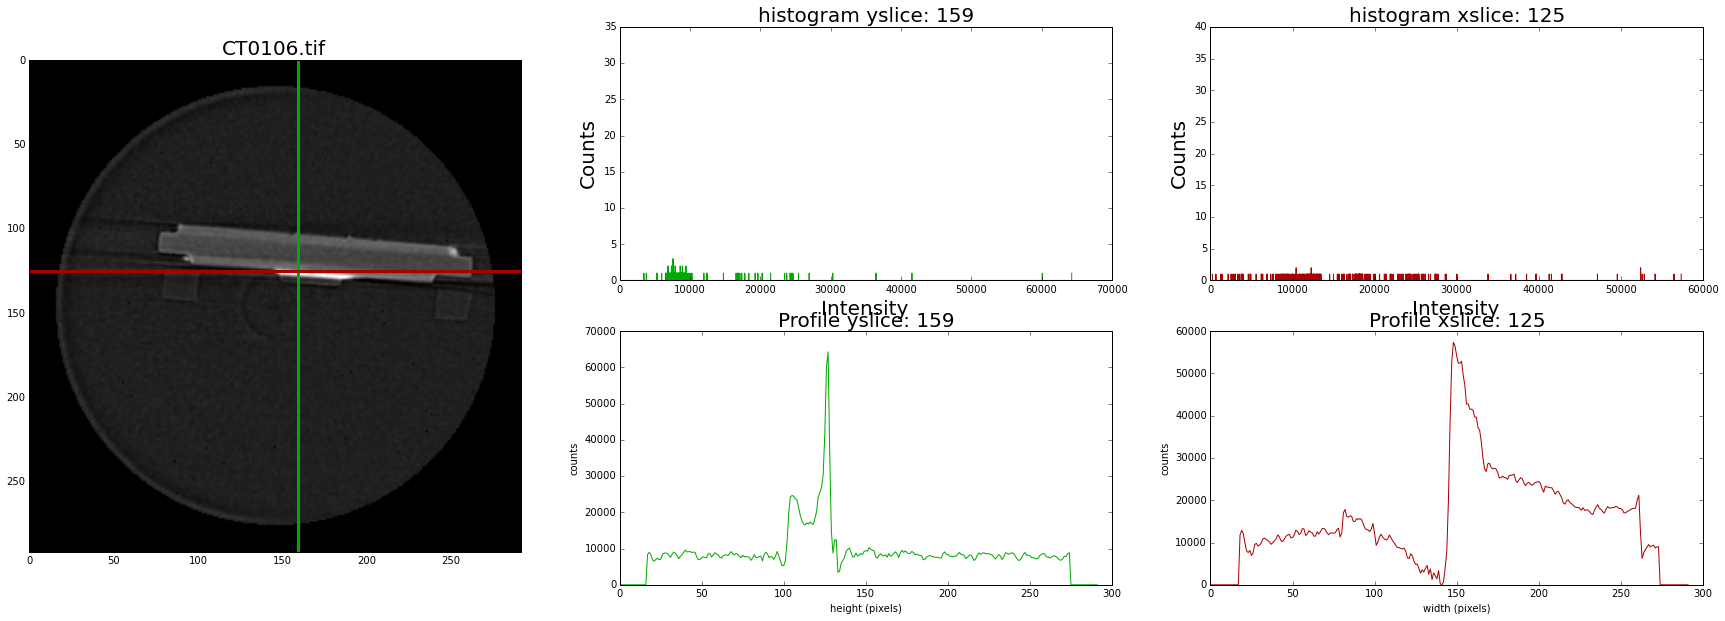

In [60]:
np.set_printoptions(edgeitems=10)

def plot_image(n, xslice, yslice, display_values, remove_max_counts):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))
    if remove_max_counts:
        histo = skimage.exposure.histogram(image, nbins=256)
        index_max_counts = histo[0].argmax(axis=0)
        max_intensity = histo[1][index_max_counts]
        index_to_remove = (image == max_intensity)
        image[index_to_remove] = 0

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot2grid((2,3), (0,0), rowspan=2)
    ax_hist_x = plt.subplot(232)
    ax_hist_y = plt.subplot(233)
    ax_profile_x = plt.subplot(235)
    ax_profile_y = plt.subplot(236)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice, color="#00aa00", linewidth=3)
    ax_img.axhline(yslice, color="#aa0000", linewidth=3)
    
    #xslice
    image_y = image[:, xslice]
    hist_y = skimage.exposure.histogram(image_y, nbins=256)
    ax_hist_x.plot(hist_y[1], hist_y[0], color="#00aa00")
    y_title = "histogram yslice: %d" %xslice
    ax_hist_x.set_title(y_title, fontsize=20)
    ax_hist_x.set_xlabel('Intensity', fontsize=20)
    ax_hist_x.set_ylabel('Counts', fontsize=20)
    
    #yslice
    image_x = image[yslice, :]
    hist_x = skimage.exposure.histogram(image_x, nbins=256)
    ax_hist_y.plot(hist_x[1], hist_x[0], color="#aa0000")
    x_title = "histogram xslice: %d" %yslice
    ax_hist_y.set_title(x_title, fontsize=20)
    ax_hist_y.set_xlabel('Intensity', fontsize=20)
    ax_hist_y.set_ylabel('Counts', fontsize=20)
    
    #xprofile
    y_axis = range(height)
    ax_profile_x.plot(y_axis, image_y, color="#00aa00")
    y_title = "Profile yslice: %d" %xslice
    ax_profile_x.set_title(y_title, fontsize=20)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('counts')

    #yprofile
    x_axis = range(width)
    ax_profile_y.plot(x_axis, image_x, color="#aa0000")
    x_title = "Profile xslice: %d" %yslice
    ax_profile_y.set_title(x_title, fontsize=20)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('counts')
    
    if display_values:
        print("size of image: %d by %d"%image.shape)
        print("Displaying image %s\n" %list_of_files[n])
        print("x_slice %d" %xslice)
        print(image_x)
        print()
        print("y_slice %d" %yslice)
        print(image_y)

interact(plot_image, n=(0, number_of_files-1, 1), 
         xslice=widgets.IntSlider(min=0, max=width, step=1, value=int(width/2)),
         yslice=widgets.IntSlider(min=0, max=height, step=1, value=int(height/2)),
         display_values = widgets.CheckboxWidget(value = False, description = 'display values'),
         remove_max_counts = widgets.CheckboxWidget(value = True, description = 'remove max counts of image'))

# Preview Slices (compare profiles)

<function __main__.plot_image>

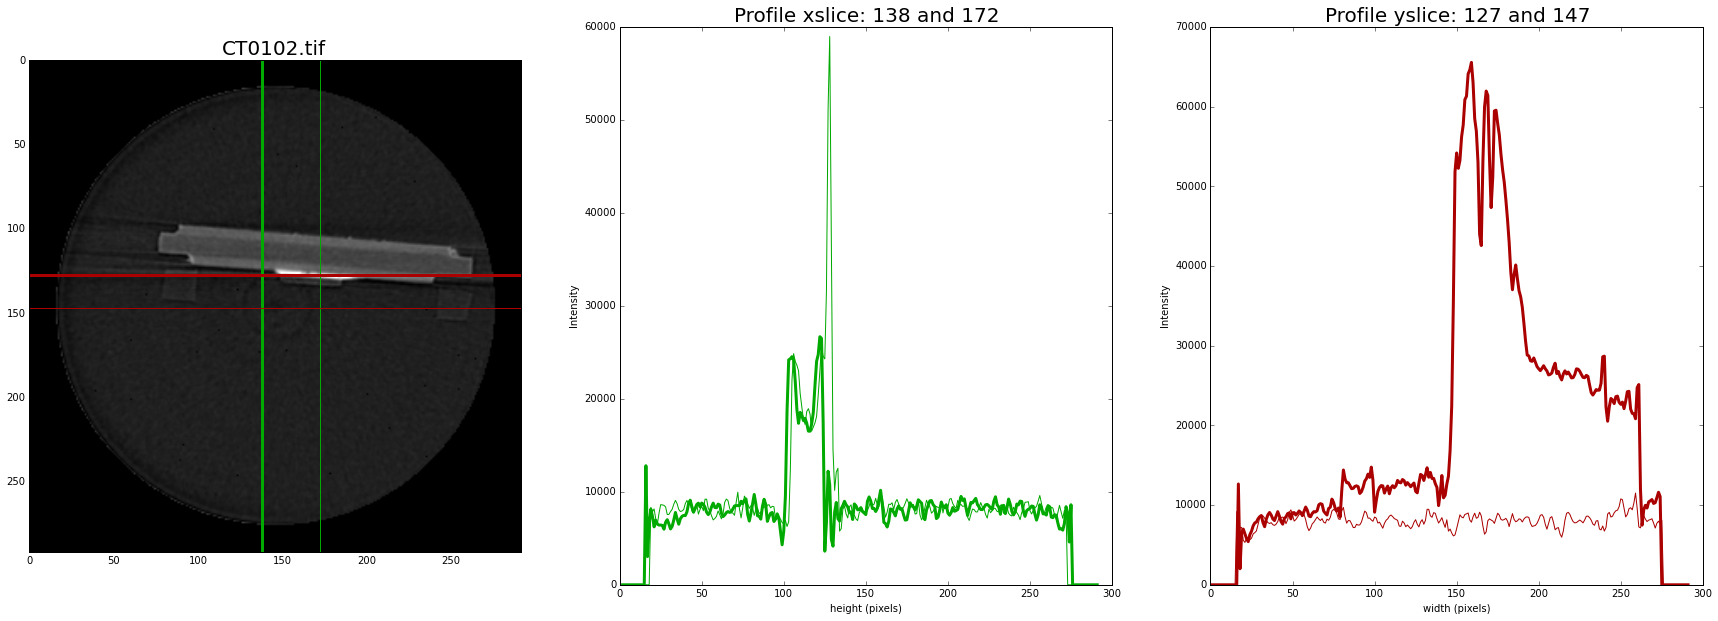

In [61]:
def plot_image(n, xslice1, xslice2, yslice1, yslice2, remove_max_counts):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))
    if remove_max_counts:
        histo = skimage.exposure.histogram(image, nbins=256)
        index_max_counts = histo[0].argmax(axis=0)
        max_intensity = histo[1][index_max_counts]
        index_to_remove = (image == max_intensity)
        image[index_to_remove] = 0

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(131)
    ax_profile_x = plt.subplot(132)
    ax_profile_y = plt.subplot(133)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice1, color="#00aa00", linewidth=3)
    ax_img.axvline(xslice2, color="#00aa00")
    ax_img.axhline(yslice1, color="#aa0000", linewidth=3)
    ax_img.axhline(yslice2, color="#aa0000")

    # profile_x
    y_axis = range(height)
    image_x1 = image[:, xslice1]
    image_x2 = image[:, xslice2]

    ax_profile_x.plot(y_axis, image_x1, color="#00aa00", linewidth=3)
    ax_profile_x.plot(y_axis, image_x2, color="#00aa00")
    x_title = "Profile xslice: %d and %d" %(xslice1, xslice2)
    ax_profile_x.set_title(x_title, fontsize=20)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('Intensity')

    # profile_y
    x_axis = range(width)
    image_y1 = image[yslice1, :]
    image_y2 = image[yslice2, :]

    ax_profile_y.plot(x_axis, image_y1, color="#aa0000", linewidth=3)
    ax_profile_y.plot(x_axis, image_y2, color="#aa0000")
    y_title = "Profile yslice: %d and %d" %(yslice1, yslice2)
    ax_profile_y.set_title(y_title, fontsize=20)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('Intensity')

interact(plot_image, n=(0, number_of_files-1, 1), 
         xslice1 = widgets.IntSlider(min=0, max=width, step=1, value=138),
         xslice2 = widgets.IntSlider(min=0, max=width, step=1, value=172),
         yslice1 = widgets.IntSlider(min=0, max=height, step=1, value=127),
         yslice2 = widgets.IntSlider(min=0, max=height, step=1, value=147),
         remove_max_counts = widgets.CheckboxWidget(value = True, description = 'remove max counts of image'))

Analysis: it seems that, using:
    - file n:33, 
    - xslice1:138, 
    - xslice2:172, 
    - yslice1:127, 
    - yslice2:147 
 in the previous step, the pixels of interests have counts above **30,000**! 

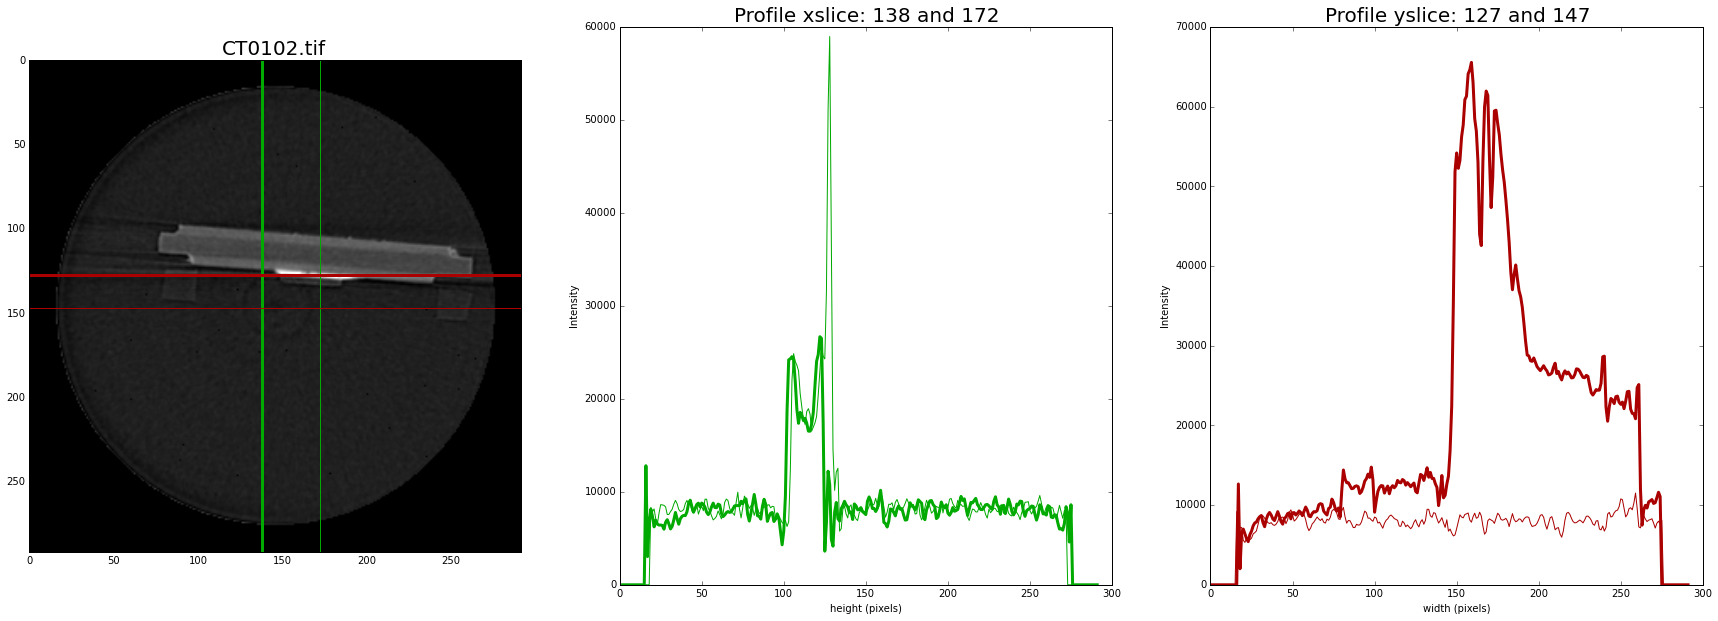

In [62]:
def plot_image(n, xslice1, xslice2, yslice1, yslice2, remove_max_counts):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))
    if remove_max_counts:
        histo = skimage.exposure.histogram(image, nbins=256)
        index_max_counts = histo[0].argmax(axis=0)
        max_intensity = histo[1][index_max_counts]
        index_to_remove = (image == max_intensity)
        image[index_to_remove] = 0

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(131)
    ax_profile_x = plt.subplot(132)
    ax_profile_y = plt.subplot(133)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice1, color="#00aa00", linewidth=3)
    ax_img.axvline(xslice2, color="#00aa00")
    ax_img.axhline(yslice1, color="#aa0000", linewidth=3)
    ax_img.axhline(yslice2, color="#aa0000")

    # profile_x
    y_axis = range(height)
    image_x1 = image[:, xslice1]
    image_x2 = image[:, xslice2]

    ax_profile_x.plot(y_axis, image_x1, color="#00aa00", linewidth=3)
    ax_profile_x.plot(y_axis, image_x2, color="#00aa00")
    x_title = "Profile xslice: %d and %d" %(xslice1, xslice2)
    ax_profile_x.set_title(x_title, fontsize=20)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('Intensity')

    # profile_y
    x_axis = range(width)
    image_y1 = image[yslice1, :]
    image_y2 = image[yslice2, :]

    ax_profile_y.plot(x_axis, image_y1, color="#aa0000", linewidth=3)
    ax_profile_y.plot(x_axis, image_y2, color="#aa0000")
    y_title = "Profile yslice: %d and %d" %(yslice1, yslice2)
    ax_profile_y.set_title(y_title, fontsize=20)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('Intensity')
    
plot_image(33, 138, 172, 127, 147, True)

# Trying to remove all the pixels that have an intensity below a given value

In [85]:
threshold_value = widgets.Text(description = 'Threshold value to keep',
                                value = '30000')
display(threshold_value)

In [97]:
# calculate the new images
max_intensity = float(threshold_value.value)
image_new_array = []
for _file in list_of_files:
    image_new = mpimg.imread(os.path.join(data_folder, _file))
            
    index_to_remove = (image_new < max_intensity)
    image_new[index_to_remove] = 0
    
    image_new_array.append(image_new)
    

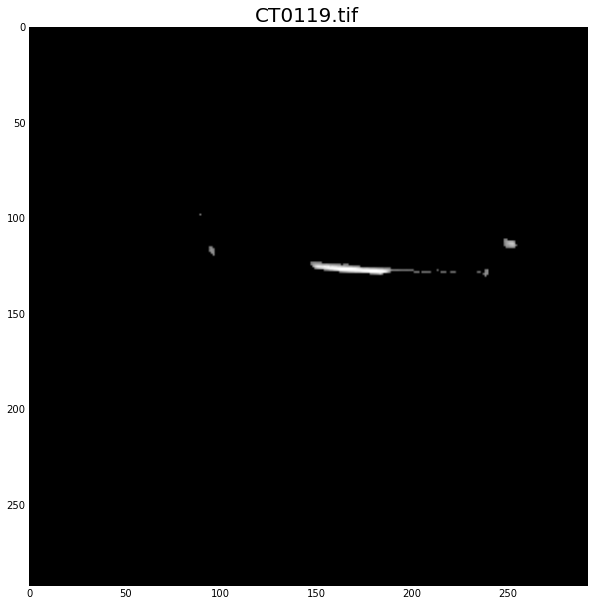

In [98]:
# visualize the new images
def plot_image(n):
    image = image_new_array[n]

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(111)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)

interact(plot_image, n=(0, number_of_files-1, 1))

<function __main__.plot_image>

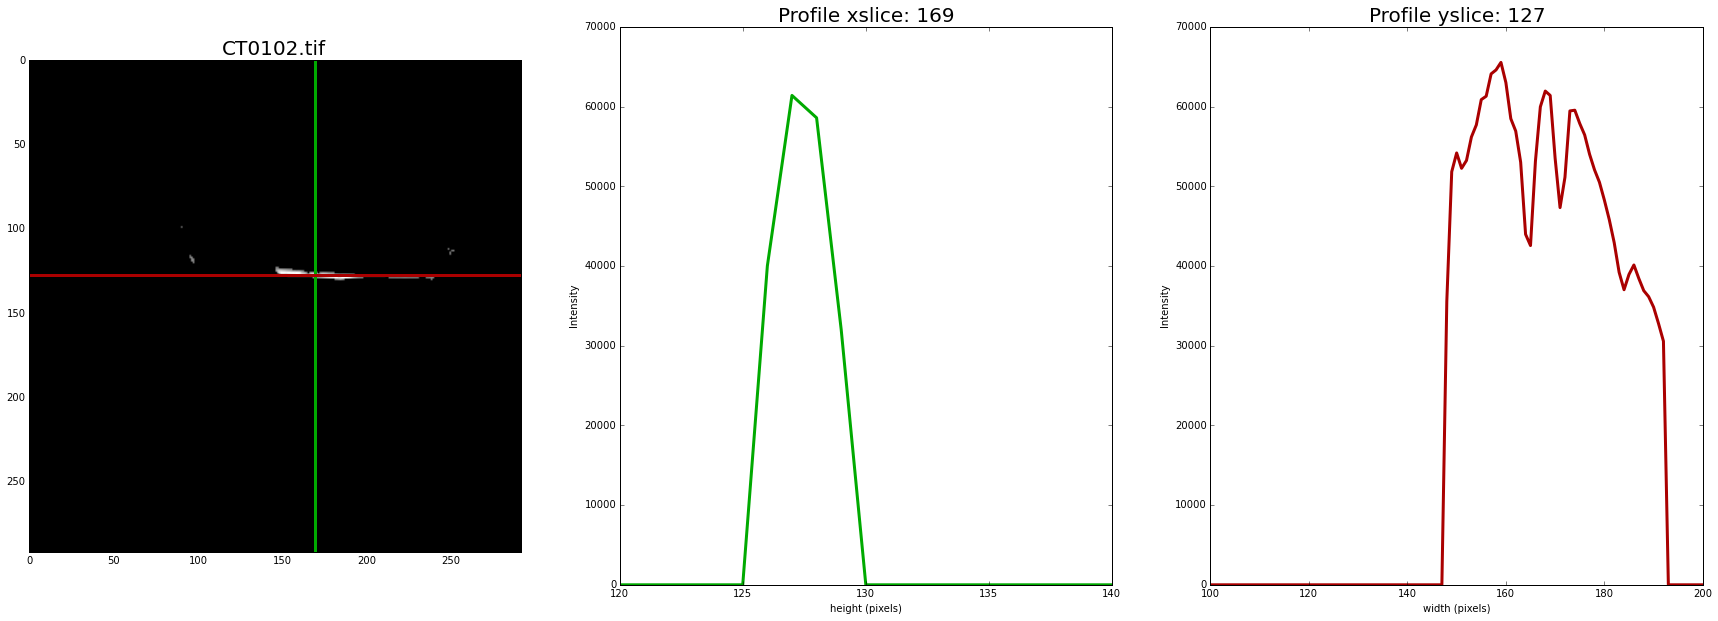

In [109]:
def plot_image(n, xslice1, yslice1, xmin, xmax, ymin, ymax):
    image = image_new_array[n]

    fig = plt.figure(figsize=(30,10))
    ax_img = plt.subplot(131)
    ax_profile_x = plt.subplot(132)
    ax_profile_y = plt.subplot(133)

    #image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
    ax_img.axvline(xslice1, color="#00aa00", linewidth=3)
    ax_img.axhline(yslice1, color="#aa0000", linewidth=3)

    # profile_x
    y_axis = range(height)
    image_x1 = image[:, xslice1]

    ax_profile_x.plot(y_axis, image_x1, color="#00aa00", linewidth=3)
    x_title = "Profile xslice: %d" %(xslice1)
    ax_profile_x.set_title(x_title, fontsize=20)
    ax_profile_x.set_xlim(xmin, xmax)
    ax_profile_x.set_xlabel('height (pixels)')
    ax_profile_x.set_ylabel('Intensity')

    # profile_y
    x_axis = range(width)
    image_y1 = image[yslice1, :]

    ax_profile_y.plot(x_axis, image_y1, color="#aa0000", linewidth=3)
    y_title = "Profile yslice: %d" %(yslice1)
    ax_profile_y.set_title(y_title, fontsize=20)
    ax_profile_y.set_xlim(ymin, ymax)
    ax_profile_y.set_xlabel('width (pixels)')
    ax_profile_y.set_ylabel('Intensity')

interact(plot_image, n=(0, number_of_files-1, 1), 
         xslice1 = widgets.IntSlider(min=0, max=width, step=1, value=169),
         yslice1 = widgets.IntSlider(min=0, max=height, step=1, value=127),
         xmin = widgets.IntSlider(min=0, max=width, step=1, value=120),
         xmax = widgets.IntSlider(min=0, max=width, step=1, value=140),
         ymin = widgets.IntSlider(min=0, max=width, step=1, value=100),
         ymax = widgets.IntSlider(min=0, max=width, step=1, value=200))
         


## Working on Sample selected

--> **Select the slide you want to work on**

Ideally, you will pick a slide that does not contain the object to isolate. You will then have the option to select a range of pixels to remove. those pixels will be removed from all the slides.



<function __main__.plot_image>

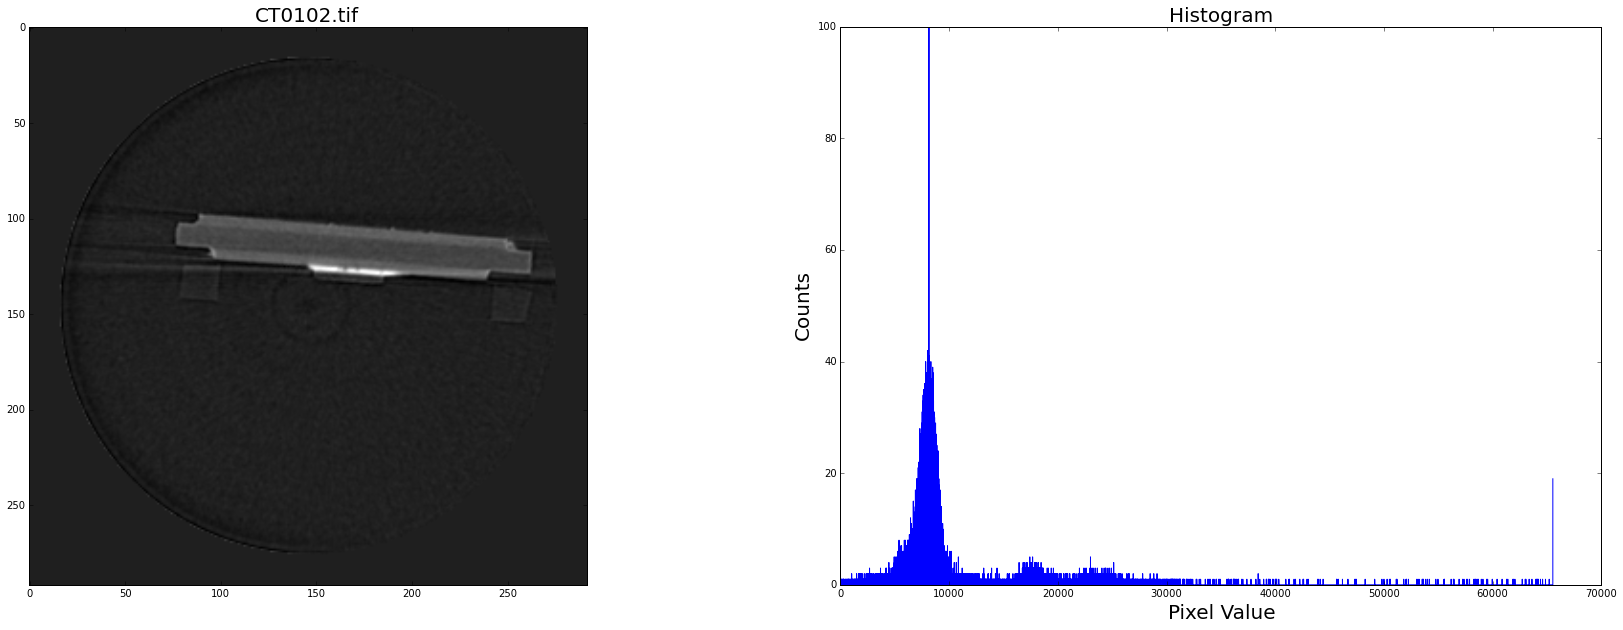

In [63]:
def plot_image(n):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
    ax_img, ax_hist = axes
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
     
    histo = skimage.exposure.histogram(image, nbins=256)
    ax_hist.plot(histo[1], histo[0])
#    ax_hist.set_xlim(8000, 10000)
    ax_hist.set_ylim(0, 100)
    ax_hist.set_title('Histogram', fontsize=20)
    ax_hist.set_xlabel('Pixel Value', fontsize=20)
    ax_hist.set_ylabel('Counts', fontsize=20)
    
    #calculate intensity corresponding to max Counts
    index_max_counts = histo[0].argmax(axis=0)
    max_intensity = histo[1][index_max_counts]
    
    f = open('config/config_file.txt','w')
    f.write("index_image : %s\n" %n)
    f.write("max_x_axis : %d\n" %(histo[1][-1]))
    f.write("max_y_axis : %d\n" %(max(histo[0])))
    f.write("max_intensity: %d" %(max_intensity))
    f.close()
    
#    plt.title(list_of_files[n])
#    plt.show()

interact(plot_image, n=(0, number_of_files-1, 1))

##Compare images and histogram of two different slides

<function __main__.plot_image>

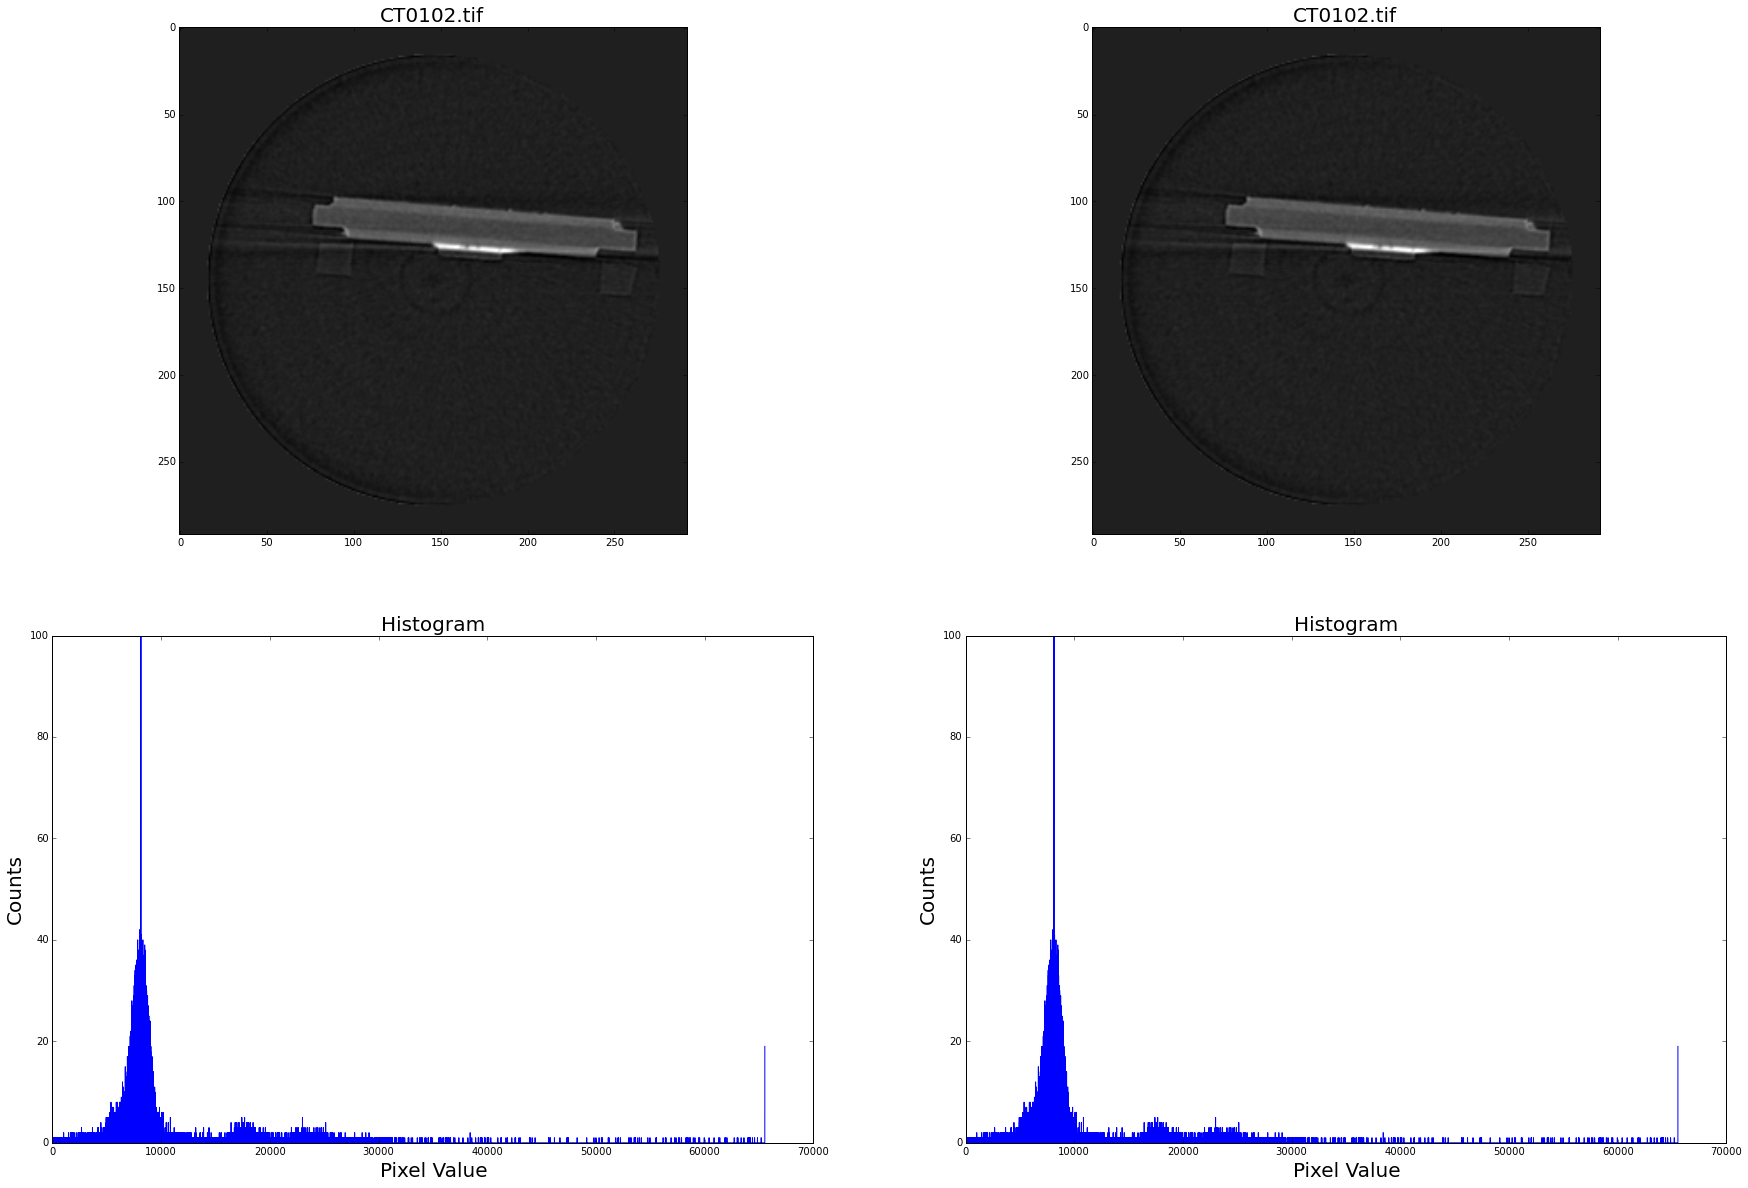

In [64]:
def plot_image(index_image1, index_image2, ylog):
    image1 = mpimg.imread(os.path.join(data_folder, list_of_files[index_image1]))
    image2 = mpimg.imread(os.path.join(data_folder, list_of_files[index_image2]))
    
    nbins = 65000
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
    top, bottom = axes
    
    ax_img1, ax_img2 = top
    ax_hist1, ax_hist2 = bottom
    
    ax_img1.imshow(image1, cmap=plt.cm.gray)
    ax_img1.set_title(list_of_files[index_image1], fontsize=20)

    ax_img2.imshow(image2, cmap=plt.cm.gray)
    ax_img2.set_title(list_of_files[index_image2], fontsize=20)

    histo1 = skimage.exposure.histogram(image1, nbins = nbins)
    if ylog:
        ax_hist1.semilogy(histo1[1], histo1[0])
    else:
        ax_hist1.plot(histo1[1], histo1[0])
#    ax_hist.set_xlim(8000, 10000)
    ax_hist1.set_ylim(0, 100)
    ax_hist1.set_title('Histogram', fontsize=20)
    ax_hist1.set_xlabel('Pixel Value', fontsize=20)
    ax_hist1.set_ylabel('Counts', fontsize=20)

    histo2 = skimage.exposure.histogram(image2, nbins = nbins)
    if ylog:
        ax_hist2.semilogy(histo2[1], histo2[0])
    else:
        ax_hist2.plot(histo2[1], histo2[0])
#    ax_hist.set_xlim(8000, 10000)
    ax_hist2.set_ylim(0, 100)
    ax_hist2.set_title('Histogram', fontsize=20)
    ax_hist2.set_xlabel('Pixel Value', fontsize=20)
    ax_hist2.set_ylabel('Counts', fontsize=20)

interact(plot_image, index_image1=(0, number_of_files-1, 1), 
         index_image2=(0, number_of_files-1, 1), 
         ylog=widgets.CheckboxWidget(value=False, description='Log y-axis'))

## Recovering parameters from selected slide

In [65]:
# recovering parameters saved in the config_file.txt
f = open('config/config_file.txt', 'r')
array_file = []
array_file = f.read()
line_split = array_file.split('\n')
dict_variable = {}
for line in line_split:
    _line = line.split(':')
    _name = _line[0].strip()
    _value = _line[1].strip()
    dict_variable[_name] = _value

f.close()
#print(dict_variable['max_x_axis'])    # to retrieve values from config_file.txt

In [66]:
# retrieve values from config_file.txt
xmax = int(dict_variable['max_x_axis'])
ymax = int(dict_variable['max_y_axis'])
index = int(dict_variable['index_image'])
max_intensity = int(dict_variable['max_intensity'])
print("=================")
print("max_x_axis: %d" %xmax)
print("max_y_axis: %d" %ymax)
print("max_intensity: %d" %max_intensity)

max_x_axis: 65535
max_y_axis: 32196
max_intensity: 8140


# Start Analysis of peaks

## Remove or Keep 

** -> Do you want to remove the range you gonna select, or keep it ?**

In [67]:
# do you want to keep the selection of remove the selection
w = widgets.Dropdown(options = ['Keep Range Selected','Remove Range Selected'], 
                     value='Remove Range Selected', 
                     description='Choose the type of operation you want to perform')
display(w)

## Visualize histogram we are going to work on.

You gonna have the option to change the range displayed. This way you will be able to optimize your fitting curve.

<function __main__.plot_histo>

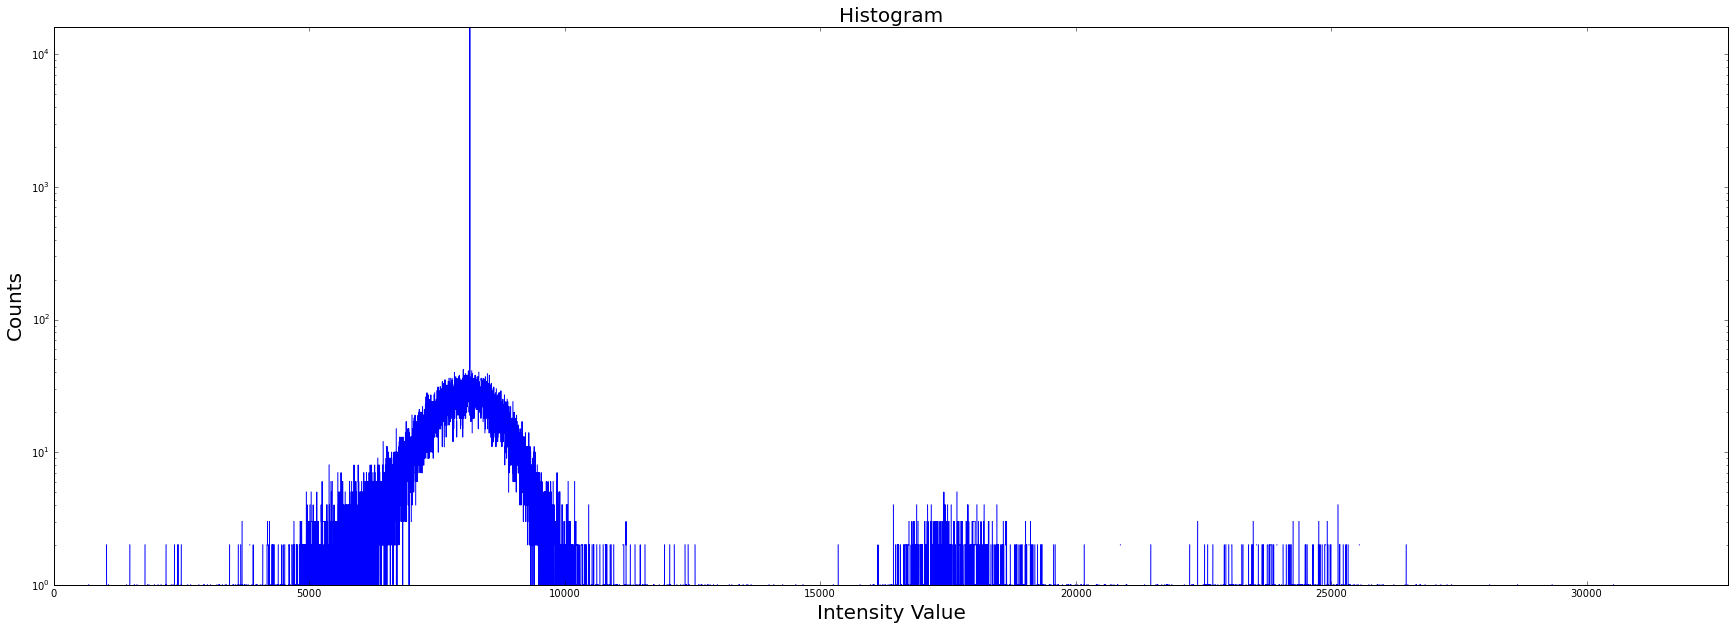

In [68]:
def plot_histo(xmax_value, ymax_value, ylog):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[index]))
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,10))
    ax_hist = axes
    histo = skimage.exposure.histogram(image, nbins=256)

    if ylog:
        ax_hist.semilogy(histo[1], histo[0])
    else:
        ax_hist.plot(histo[1], histo[0])
    ax_hist.set_xlim(0, xmax_value)
    ax_hist.set_ylim(0, ymax_value)
    
    ax_hist.set_title('Histogram', fontsize=20)
    ax_hist.set_xlabel('Intensity Value', fontsize=20)
    ax_hist.set_ylabel('Counts', fontsize=20)
    
    f = open('config/user_config_file.txt','w')
    f.write("user_xmax_value : %d\n" %xmax_value)
    f.write("user_ymax_value : %d\n" %ymax_value)
    f.write("user_ylog: %s" %ylog)
    f.close()
    
# display histogram of data to work with with possibilities to scale the axis
interact(plot_histo, xmax_value=(0, xmax, 1), 
         ymax_value=(0, ymax, 1), 
         ylog=widgets.CheckboxWidget(value=True, description='Log y-axis'))


# Remove or not Particular pixels according to their intensity

We gonna give you the option to remove a given *intensity* value (max counts found or other).

In [69]:
# maybe remove the pixels with the max counts of each slide!
w_remove_max_intensity = widgets.CheckboxWidget(value=True, description='Do you want to remove the max intensity of each slide')
display(w_remove_max_intensity)

In [70]:
# recovering parameters saved in the config_file.txt
f = open('config/user_config_file.txt', 'r')
array_file = []
array_file = f.read()
line_split = array_file.split('\n')
dict_variable = {}
for line in line_split:
    _line = line.split(':')
    _name = _line[0].strip()
    _value = _line[1].strip()
    dict_variable[_name] = _value
f.close()

# retrieve values from config_file.txt
user_xmax_value = int(dict_variable['user_xmax_value'])
user_ymax_value = int(dict_variable['user_ymax_value'])
user_ylog = bool(dict_variable['user_ylog'])

Working with file: CT0102.tif


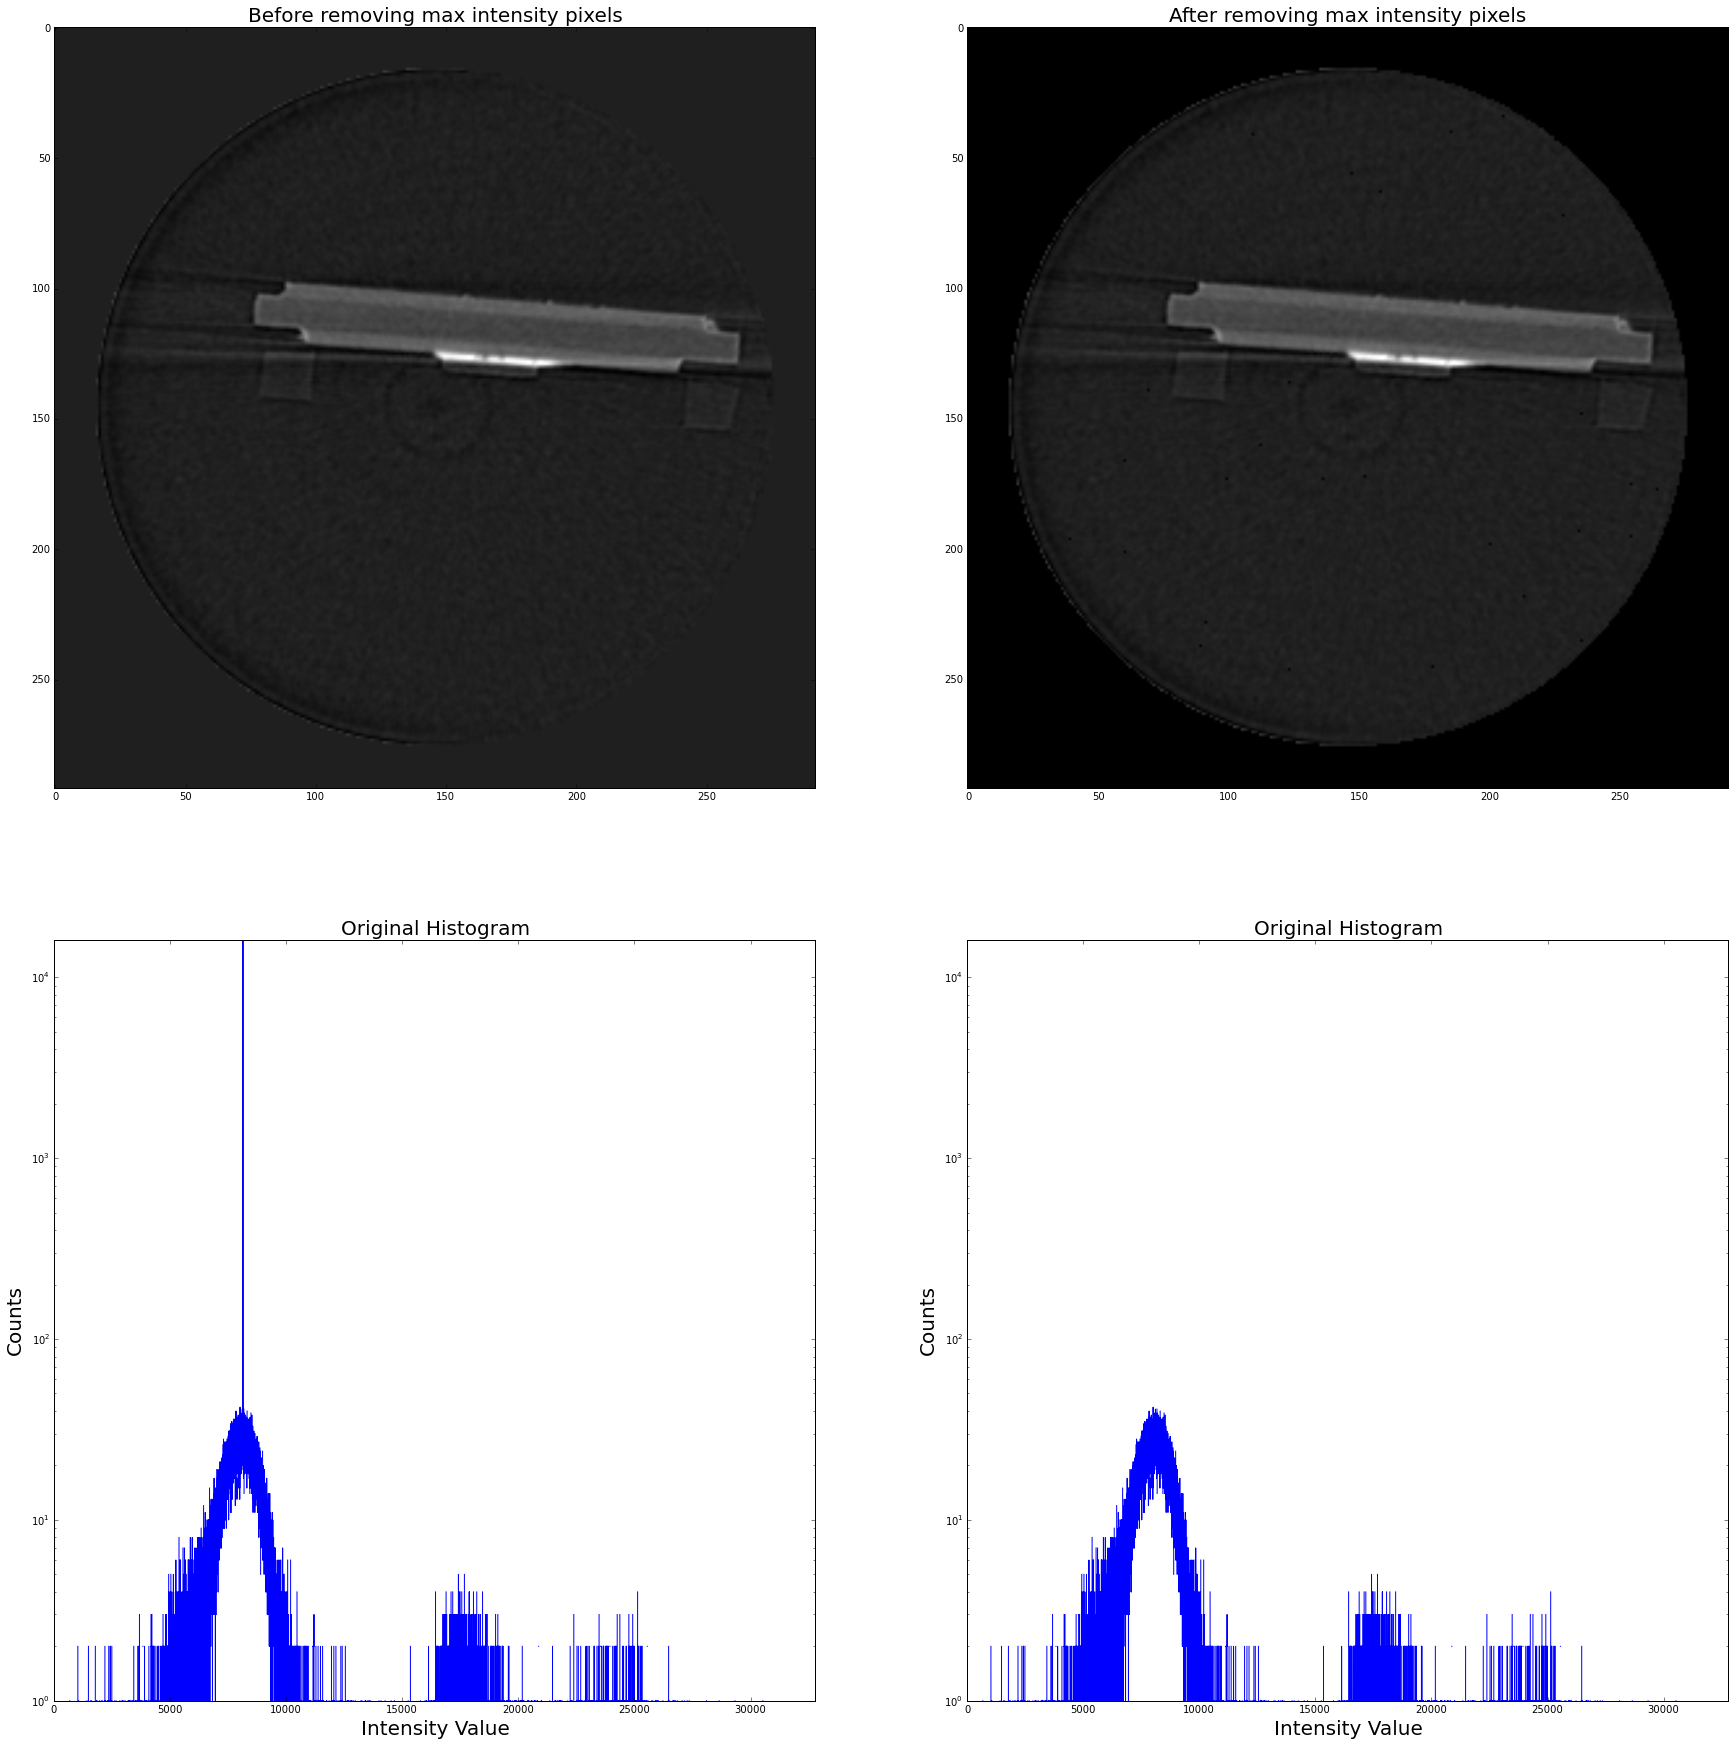

In [71]:
image_before = mpimg.imread(os.path.join(data_folder, list_of_files[index]))
print('Working with file: %s' %list_of_files[index])
if w_remove_max_intensity.value:
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
    top, bottom = axes

    ax_img_before, ax_img_after = top
    ax_hist_before, ax_hist_after = bottom

    ax_img_before.imshow(image_before, cmap=plt.cm.gray)
    ax_img_before.set_title('Before removing max intensity pixels', fontsize=20)

    histo_before = skimage.exposure.histogram(image_before, nbins=256)
    image_after = image_before.copy()
    if w_remove_max_intensity.value:
        index_max_counts = histo_before[0].argmax(axis=0)
        max_intensity = histo_before[1][index_max_counts]
        index_to_remove = (image_before == max_intensity)
        image_after[index_to_remove] = 0
    
    ax_img_after.imshow(image_after, cmap=plt.cm.gray)
    ax_img_after.set_title("After removing max intensity pixels", fontsize=20)
    
    if user_ylog:
        ax_hist_before.semilogy(histo_before[1], histo_before[0])
    else:
        ax_hist_before.plot(histo[1], histo[0])
    ax_hist_before.set_xlim(0, user_xmax_value)
    ax_hist_before.set_ylim(0, user_ymax_value)
    
    ax_hist_before.set_title('Original Histogram', fontsize=20)
    ax_hist_before.set_xlabel('Intensity Value', fontsize=20)
    ax_hist_before.set_ylabel('Counts', fontsize=20)

    histo_after = skimage.exposure.histogram(image_after, nbins=256)
    if user_ylog:
        ax_hist_after.semilogy(histo_after[1], histo_after[0])
    else:
        ax_hist_after.plot(histo_after[1], histo[0])
    ax_hist_after.set_xlim(0, user_xmax_value)
    ax_hist_after.set_ylim(0, user_ymax_value)
    
    ax_hist_after.set_title('Original Histogram', fontsize=20)
    ax_hist_after.set_xlabel('Intensity Value', fontsize=20)
    ax_hist_after.set_ylabel('Counts', fontsize=20)
    
   

# Selection of Range to Keep/Remove


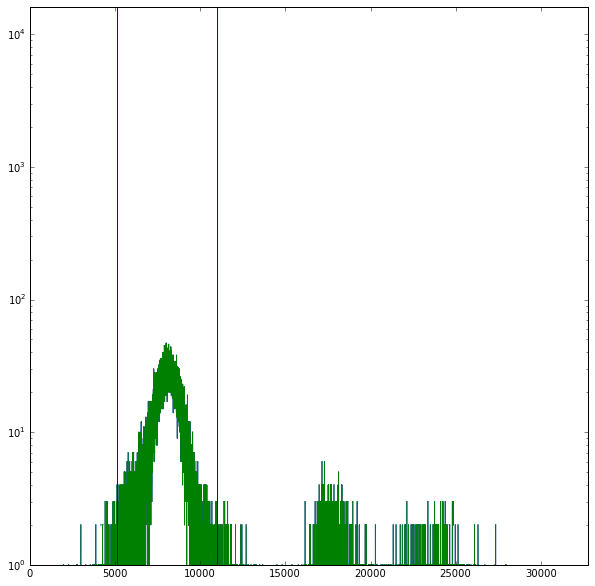

In [43]:
def display_range(x_left, x_right):
    fig = plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    ax.plot(histo_after[1], histo_after[0])
    ax.set_xlim(1, user_xmax_value)
    ax.set_ylim(1, user_ymax_value)
    ax.semilogy(histo_after[1], histo_after[0])
    
    ax.axvline(x_left)
    ax.axvline(x_right)
    
    f = open('config/user_config_file_selection.txt','w')
    f.write("x_left_value : %d\n" %x_left)
    f.write("x_right_value : %d" %x_right)
    f.close()

    
interact(display_range, x_left=(0, user_xmax_value-1, 1), x_right=(0, user_xmax_value, 1))

In [72]:
# recovering parameters saved in the config_file.txt
f = open('config/user_config_file_selection.txt', 'r')
array_file = []
array_file = f.read()
line_split = array_file.split('\n')
dict_variable = {}
for line in line_split:
    _line = line.split(':')
    _name = _line[0].strip()
    _value = _line[1].strip()
    dict_variable[_name] = _value
f.close()

# retrieve values from config_file.txt
user_x_left_value = int(dict_variable['x_left_value'])
user_x_right_value = int(dict_variable['x_right_value'])

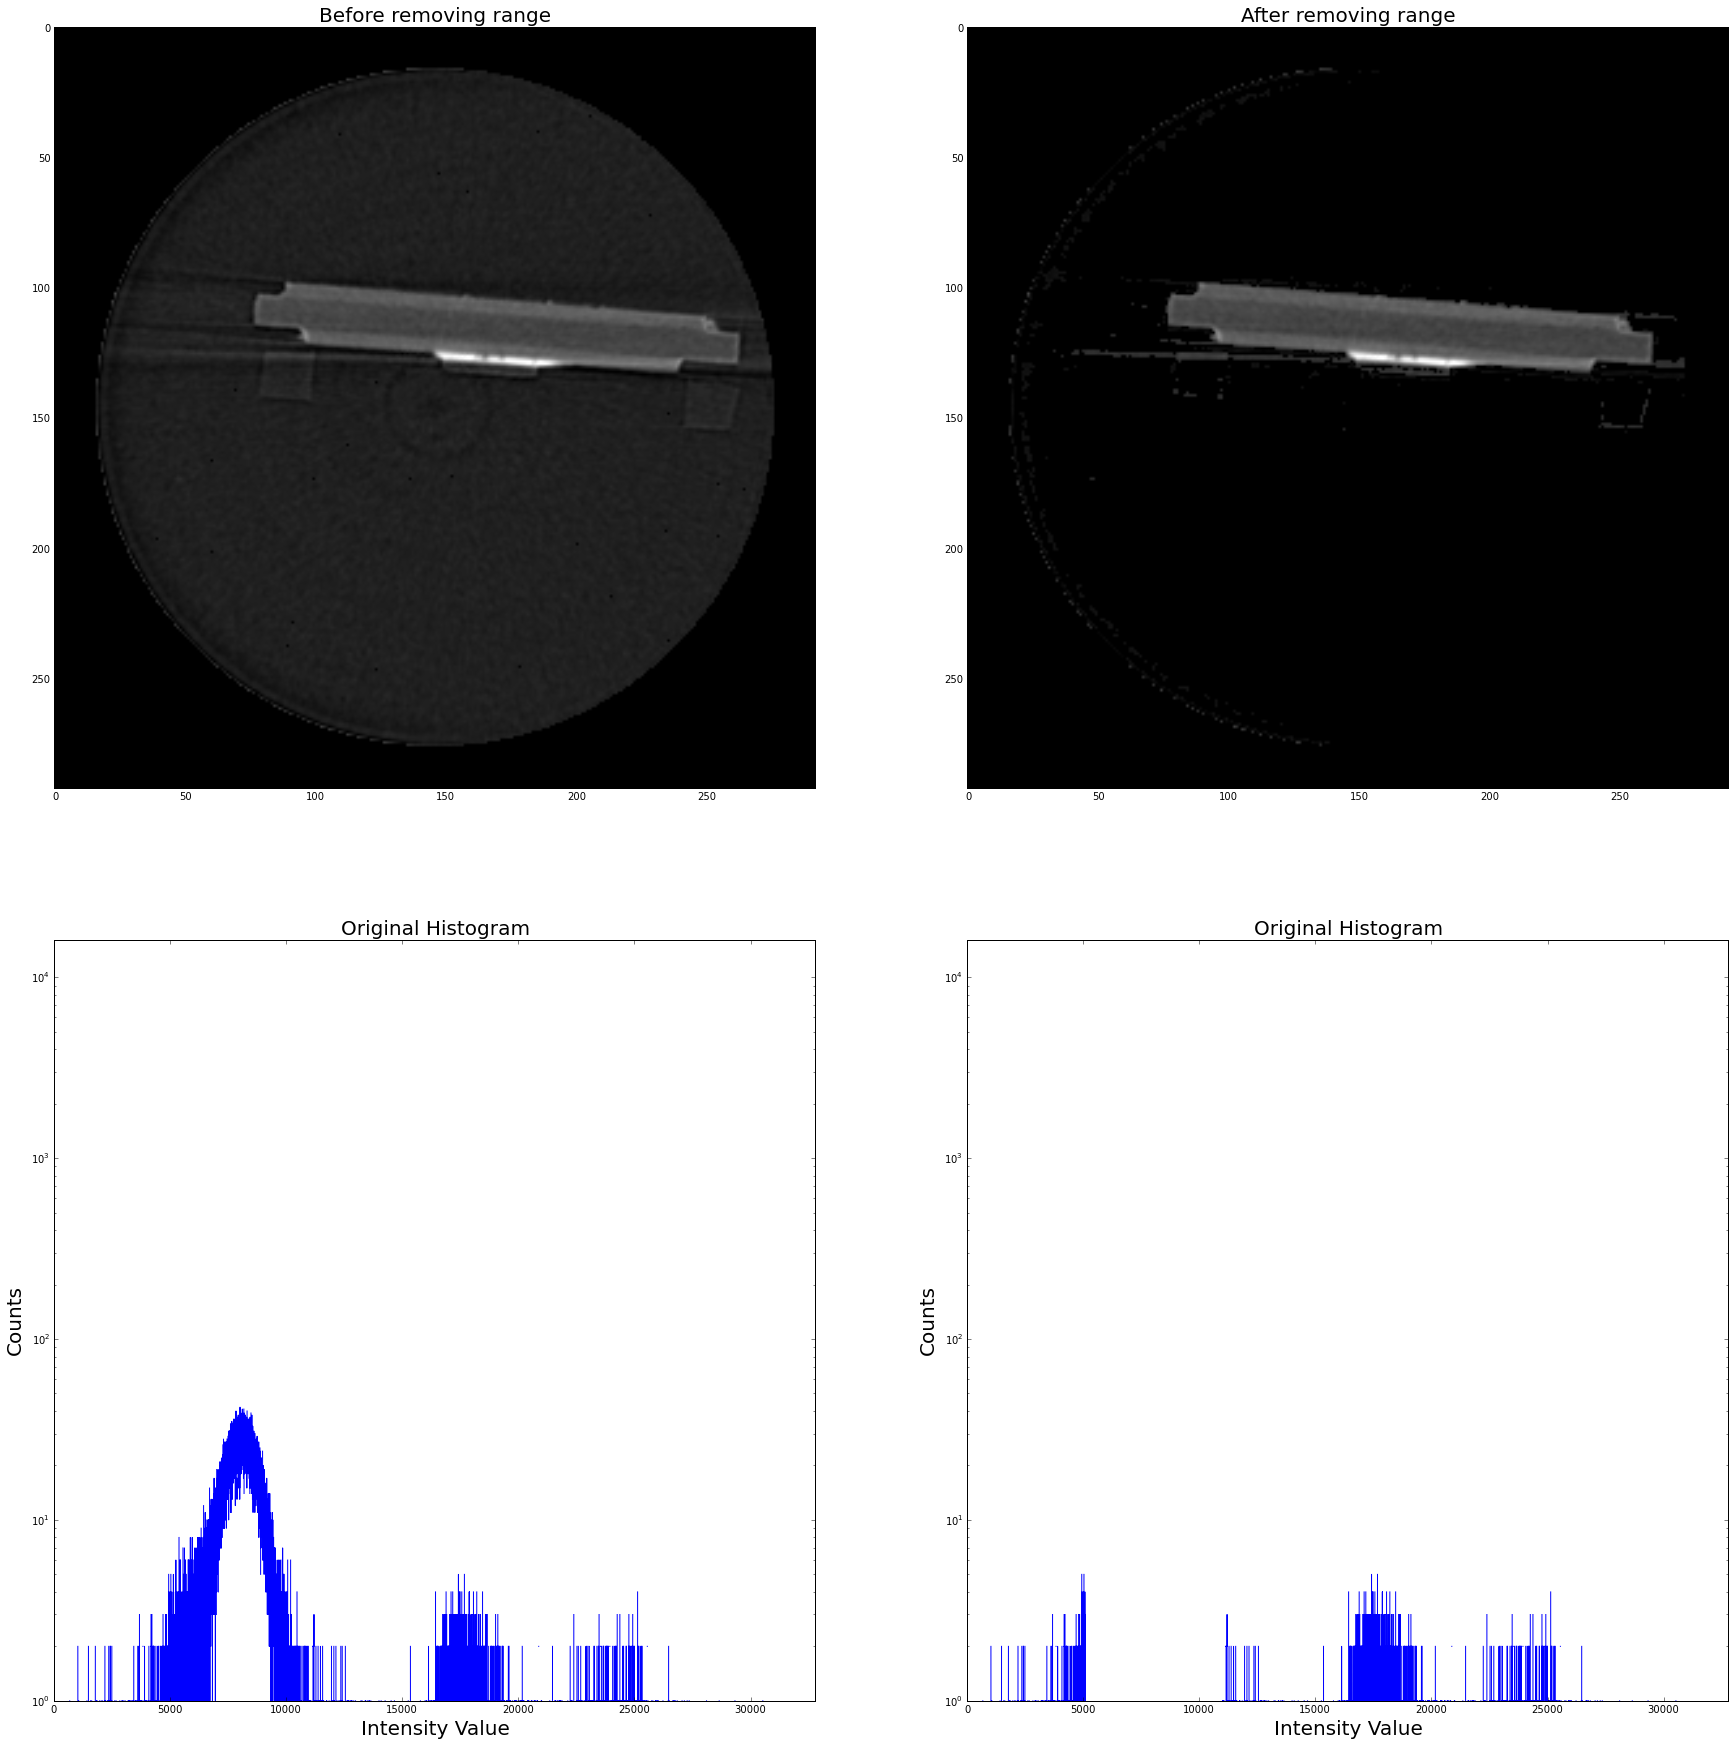

In [73]:
# find all the pixels that are part of this region
index_in_region_1 = image_after >= user_x_left_value
index_in_region_2 = image_after <= user_x_right_value
new_image_before = image_after.copy()
new_image_after = image_after.copy()
import scipy
index_in_region = scipy.logical_and(index_in_region_1, index_in_region_2)
new_image_after[index_in_region] = 0

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
top, bottom = axes

#before and after cut in range
ax_img_before, ax_img_after = top
ax_hist_before, ax_hist_after = bottom

ax_img_before.imshow(new_image_before, cmap=plt.cm.gray)
ax_img_before.set_title('Before removing range', fontsize=20)

ax_img_after.imshow(new_image_after, cmap=plt.cm.gray)
ax_img_after.set_title("After removing range", fontsize=20)
    
histo_before = skimage.exposure.histogram(new_image_before, nbins=256)
if user_ylog:
    ax_hist_before.semilogy(histo_before[1], histo_before[0])
else:
    ax_hist_before.plot(histo[1], histo[0])
    
ax_hist_before.set_xlim(0, user_xmax_value)
ax_hist_before.set_ylim(0, user_ymax_value)
    
ax_hist_before.set_title('Original Histogram', fontsize=20)
ax_hist_before.set_xlabel('Intensity Value', fontsize=20)
ax_hist_before.set_ylabel('Counts', fontsize=20)

histo_after = skimage.exposure.histogram(new_image_after, nbins=256)
if user_ylog:
    ax_hist_after.semilogy(histo_after[1], histo_after[0])
else:
    ax_hist_after.plot(histo_after[1], histo[0])

ax_hist_after.set_xlim(0, user_xmax_value)
ax_hist_after.set_ylim(0, user_ymax_value)
    
ax_hist_after.set_title('Original Histogram', fontsize=20)
ax_hist_after.set_xlabel('Intensity Value', fontsize=20)
ax_hist_after.set_ylabel('Counts', fontsize=20)
    

<function __main__.plot_image>

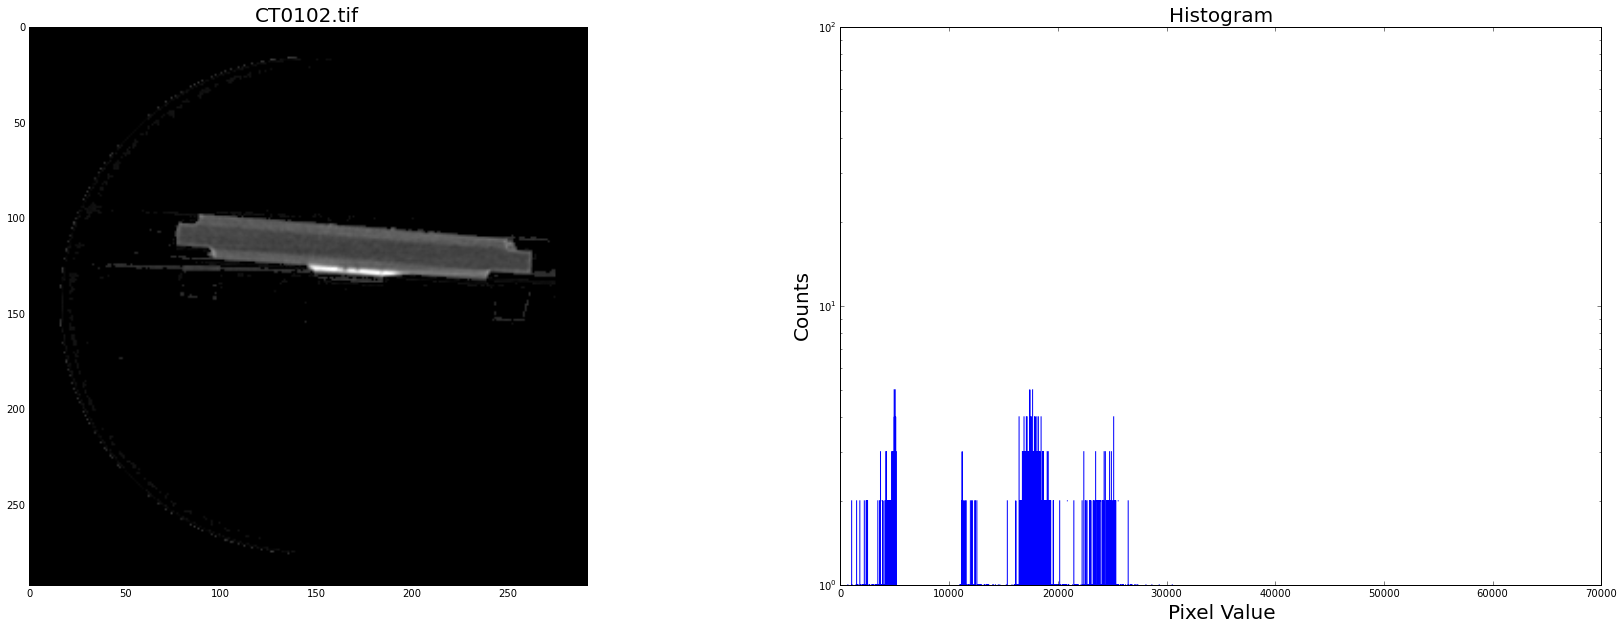

In [74]:
# validate to perform pixel remove over all other images and provide slider to go other all those images, plot 
# histogram on the side with fitted curve previously selected

def plot_image(n):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
    ax_img, ax_hist = axes
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
        
    image[index_in_region] = 0
    index_to_remove = (image_before == max_intensity)
    image[index_to_remove] = 0
    histo = skimage.exposure.histogram(image, nbins=256)
    ax_hist.semilogy(histo[1], histo[0])

    ax_hist_after.set_xlim(0, user_xmax_value)
    ax_hist_after.set_ylim(0, user_ymax_value)

    ax_hist.set_ylim(0, 100)
    ax_hist.set_title('Histogram', fontsize=20)
    ax_hist.set_xlabel('Pixel Value', fontsize=20)
    ax_hist.set_ylabel('Counts', fontsize=20)
    
interact(plot_image, n=(0, number_of_files-1, 1))



# Export resulting images

In [549]:
w_export_images = widgets.CheckboxWidget(value=False, description='Do you want to export images?')
display(w_export_images)

In [561]:
if w_export_images.value:
    output_folder = data_folder + '_worked'
    
    for _file in list_of_files:
        image = mpimg.imread(os.path.join(data_folder, _file))
        image[index_in_region] = 0
        index_to_remove = (image_before == max_intensity)
        image[index_to_remove] = 0
        
        plt.imsave(os.path.join(output_folder, _file), image, cmap=plt.cm.gray)